In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", "{:.4f}".format)

In [2]:
loans = pd.read_csv('data/LendingClub_2007_to_2018Q4.csv')

print("Total rows:", len(loans))
print("Total columns:", loans.shape[1])

loans.head()

/var/folders/w8/m_kyvxdd6wb21r5j2p5qqw7r0000gn/T/ipykernel_57818/3492934385.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  loans = pd.read_csv('data/LendingClub_2007_to_2018Q4.csv')


Total rows: 2260701
Total columns: 151


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0000,3600.0000,3600.0000,36 months,13.9900,123.0300,C,C4,leadman,10+ years,MORTGAGE,55000.0000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.9100,0.0000,Aug-2003,675.0000,679.0000,1.0000,30.0000,NaN,7.0000,0.0000,2765.0000,29.7000,13.0000,w,0.0000,0.0000,4421.7239,4421.7200,3600.0000,821.7200,0.0000,0.0000,0.0000,Jan-2019,122.6700,NaN,...,4.0000,7.0000,0.0000,0.0000,0.0000,3.0000,76.9000,0.0000,0.0000,0.0000,178050.0000,7746.0000,2400.0000,13734.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0000,24700.0000,24700.0000,36 months,11.9900,820.2800,C,C1,Engineer,10+ years,MORTGAGE,65000.0000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.0600,1.0000,Dec-1999,715.0000,719.0000,4.0000,6.0000,NaN,22.0000,0.0000,21470.0000,19.2000,38.0000,w,0.0000,0.0000,25679.6600,25679.6600,24700.0000,979.6600,0.0000,0.0000,0.0000,Jun-2016,926.3500,NaN,...,5.0000,22.0000,0.0000,0.0000,0.0000,2.0000,97.4000,7.7000,0.0000,0.0000,314017.0000,39475.0000,79300.0000,24667.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0000,20000.0000,20000.0000,60 months,10.7800,432.6600,B,B4,truck driver,10+ years,MORTGAGE,63000.0000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.7800,0.0000,Aug-2000,695.0000,699.0000,0.0000,NaN,NaN,6.0000,0.0000,7869.0000,56.2000,18.0000,w,0.0000,0.0000,22705.9243,22705.9200,20000.0000,2705.9200,0.0000,0.0000,0.0000,Jun-2017,15813.3000,NaN,...,3.0000,6.0000,0.0000,0.0000,0.0000,0.0000,100.0000,50.0000,0.0000,0.0000,218418.0000,18696.0000,6200.0000,14877.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0000,35000.0000,35000.0000,60 months,14.8500,829.9000,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0000,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidati

In [3]:
loans.columns = loans.columns.str.strip().str.lower()

In [4]:
print(loans.shape)
loans.columns

(2260701, 151)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [5]:
cols = [
    "loan_amnt",
    "term",
    "int_rate",
    "grade",
    "sub_grade",
    "issue_d",
    "loan_status",
    "recoveries",
    "purpose",
    "home_ownership"
]

df = loans[cols].copy()
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,issue_d,loan_status,recoveries,purpose,home_ownership
0,3600.0000,36 months,13.9900,C,C4,Dec-2015,Fully Paid,0.0000,debt_consolidation,MORTGAGE
1,24700.0000,36 months,11.9900,C,C1,Dec-2015,Fully Paid,0.0000,small_business,MORTGAGE
2,20000.0000,60 months,10.7800,B,B4,Dec-2015,Fully Paid,0.0000,home_improvement,MORTGAGE
3,35000.0000,60 months,14.8500,C,C5,Dec-2015,Current,0.0000,debt_consolidation,MORTGAGE
4,10400.0000,60 months,22.4500,F,F1,Dec-2015,Fully Paid,0.0000,major_purchase,MORTGAGE


In [6]:
# Normalize text columns
df.columns = df.columns.str.lower()

df["loan_status"] = df["loan_status"].str.lower().str.strip()
df["grade"] = df["grade"].str.strip()
df["sub_grade"] = df["sub_grade"].str.strip()
df["purpose"] = df["purpose"].str.strip()
df["home_ownership"] = df["home_ownership"].str.strip()

In [7]:
df["issue_d"] = pd.to_datetime(df["issue_d"], errors="coerce")
df = df.dropna(subset=["issue_d"])

df["vintage"] = df["issue_d"].dt.year

df["vintage"].value_counts().sort_index()

/var/folders/w8/m_kyvxdd6wb21r5j2p5qqw7r0000gn/T/ipykernel_57818/1142229771.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["issue_d"] = pd.to_datetime(df["issue_d"], errors="coerce")


vintage
2007       603
2008      2393
2009      5281
2010     12537
2011     21721
2012     53367
2013    134814
2014    235629
2015    421095
2016    434407
2017    443579
2018    495242
Name: count, dtype: int64

In [8]:
# Convert term like "36 months" → 36
df["term"] = (
    df["term"]
    .str.replace("months", "", regex=False)
    .astype(str)
    .str.strip()
    .astype(int)
)

df["term"].value_counts()

term
36    1609754
60     650914
Name: count, dtype: int64

In [9]:
default_statuses = [
    "charged off",
    "default",
    "late (31-120 days)"
]

df["is_default"] = df["loan_status"].isin(default_statuses).astype(int)

df["is_default"].mean()

np.float64(0.12830986239465503)

In [10]:
df["recoveries"] = df["recoveries"].fillna(0.0)

df["exposure"] = df["loan_amnt"]

df["loss"] = np.where(
    df["is_default"] == 1,
    df["loan_amnt"] - df["recoveries"],
    0.0
)

df[["exposure", "loss"]].describe()

,exposure,loss
count,2260668.0000,2260668.0000
mean,15046.9312,1866.5687
std,9190.2455,5716.6608
min,500.0000,-12639.2400
25%,8000.0000,0.0000
50%,12900.0000,0.0000
75%,20000.0000,0.0000
max,40000.0000,40000.0000


In [11]:
baseline_summary = {
    "total_loans": len(df),
    "total_exposure": df["exposure"].sum(),
    "default_rate": df["is_default"].mean(),
    "total_loss": df["loss"].sum(),
    "loss_rate": df["loss"].sum() / df["exposure"].sum()
}

pd.Series(baseline_summary)

total_loans          2260668.0000
total_exposure   34016115925.0000
default_rate               0.1283
total_loss        4219692182.4546
loss_rate                  0.1240
dtype: float64

In [12]:
grade_summary = (
    df.groupby("grade")
      .agg(
          loans=("exposure", "count"),
          exposure=("exposure", "sum"),
          default_rate=("is_default", "mean"),
          loss_rate=("loss", lambda x: x.sum() / df.loc[x.index, "exposure"].sum())
      )
      .sort_index()
)

grade_summary

,loans,exposure,default_rate,loss_rate
grade,,,,
A,433027,6323641900.0000,0.0359,0.0324
B,663557,9404817775.0000,0.0864,0.0789
C,650053,9775551175.0000,0.1434,0.1326
D,324424,5097344375.0000,0.2029,0.1926
E,135639,2367318100.0000,0.2817,0.2685
F,41800,799410225.0000,0.3620,0.3376
G,12168,248032375.0000,0.3941,0.3602


In [13]:
term_summary = (
    df.groupby("term")
      .agg(
          loans=("exposure", "count"),
          exposure=("exposure", "sum"),
          default_rate=("is_default", "mean"),
          loss_rate=("loss", lambda x: x.sum() / df.loc[x.index, "exposure"].sum())
      )
      .sort_index()
)

term_summary

,loans,exposure,default_rate,loss_rate
term,,,,
36,1609754,20517162875.0000,0.1092,0.1016
60,650914,13498953050.0000,0.1756,0.1582


In [14]:
purpose_summary = (
    df.groupby("purpose")
      .agg(
          loans=("exposure", "count"),
          default_rate=("is_default", "mean"),
          loss_rate=("loss", lambda x: x.sum() / df.loc[x.index, "exposure"].sum())
      )
      .sort_values("loss_rate", ascending=False)
)

purpose_summary.head(10)

,loans,default_rate,loss_rate
purpose,,,
small_business,24689,0.1992,0.1943
moving,15403,0.1553,0.1560
renewable_energy,1445,0.1626,0.1554
educational,424,0.1321,0.1479
vacation,15525,0.1223,0.1473
medical,27488,0.1340,0.1361
major_purchase,50445,0.1198,0.1346
other,139440,0.1290,0.1334
debt_consolidation,1277877,0.1389,0.1317


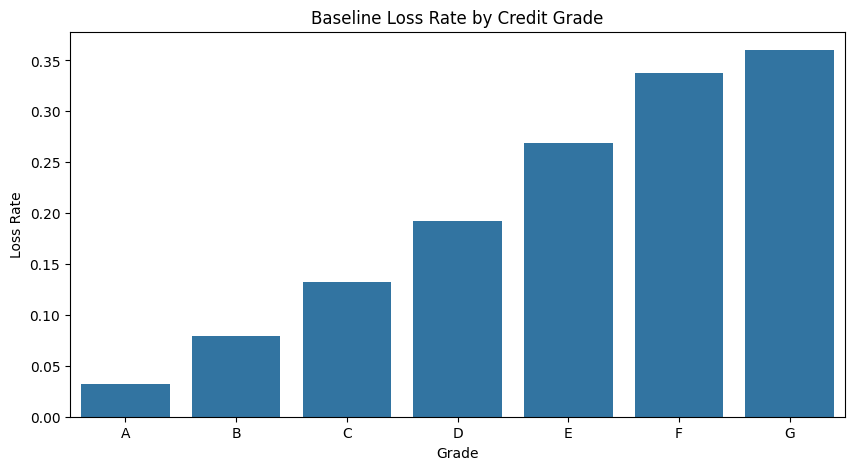

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x=grade_summary.index, y=grade_summary["loss_rate"])
plt.title("Baseline Loss Rate by Credit Grade")
plt.ylabel("Loss Rate")
plt.xlabel("Grade")
plt.show()

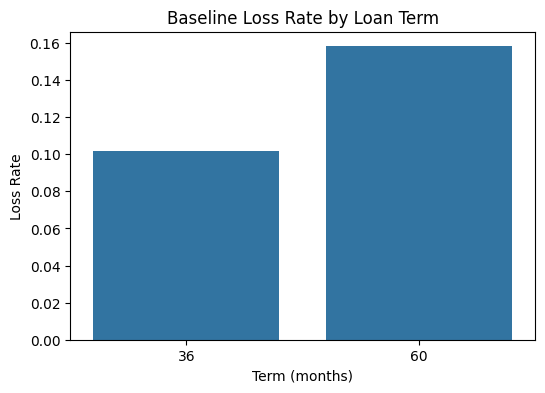

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(x=term_summary.index.astype(str), y=term_summary["loss_rate"])
plt.title("Baseline Loss Rate by Loan Term")
plt.ylabel("Loss Rate")
plt.xlabel("Term (months)")
plt.show()

In [17]:
df.to_parquet("data/processed/portfolio_baseline.parquet")
grade_summary.to_csv("data/processed/grade_baseline_summary.csv")
term_summary.to_csv("data/processed/term_baseline_summary.csv")

##  Data Summary

This analysis uses historical LendingClub loan-level data covering loans issued between **2007 and 2018**.  
The dataset contains approximately **2.26 million loans**, with a total exposure of **~$34B**.

**Key characteristics:**
- Loans are predominantly **36-month tenures**, with a significant share of **60-month loans**
- Portfolio risk increases monotonically across **credit grades A–G**
- The overall baseline default rate is approximately **12.8%**, with an aggregate loss rate of **~12.4%**
- Losses are highly concentrated among **lower credit grades and longer-term loans**

This dataset provides a **realistic and well-stratified foundation** for portfolio-level stress testing.